In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import timeit
import dask.dataframe as dd

%matplotlib inline

In [2]:
reader = pd.read_csv('../Data/train_numeric.csv', iterator=True, chunksize=50000, low_memory=False)

one_row = pd.read_csv('../Data/train_numeric.csv',  nrows=1)


reader.get_chunk(4)

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:


final = []

i=0

for chunk in reader:

    print('step: '+str(i))
    
    df = pd.melt(chunk, id_vars = 'Id', value_vars=list(one_row.columns[1:-1]))

    df['value'] = (df['value']/df['value'])

    #split is much faster than regex extract
    #%time df['variable_new'] = df['variable'].str.extract('(.*_.*)_', expand=True)
    df['variable_new'] = df['variable'].str.rsplit('_', expand=False,n=1).str.get(0)
    
    
    ddf = dd.from_pandas(df, chunksize=200000)

    ddf_grouped = ddf.groupby(['Id','variable_new'], sort=False).value.max().compute().reset_index()
    
    
    df_grouped = pd.DataFrame(ddf_grouped)


    df_pivot = pd.pivot_table(df_grouped, index='Id', columns='variable_new',
                             values='value', aggfunc=np.max).reset_index()


    col = ['Id', 'L0_S0', 'L0_S1', 'L0_S2', 'L0_S3', 'L0_S4', 'L0_S5', 'L0_S6', 'L0_S7', 'L0_S8', 'L0_S9',
     'L0_S10', 'L0_S11', 'L0_S12', 'L0_S13', 'L0_S14', 'L0_S15',
     'L0_S16', 'L0_S17', 'L0_S18', 'L0_S19', 'L0_S20', 'L0_S21', 'L0_S22', 
     'L0_S23', 'L1_S24', 'L1_S25', 'L2_S26', 'L2_S27', 'L2_S28',
     'L3_S29', 'L3_S30', 'L3_S31', 'L3_S32', 'L3_S33', 'L3_S34', 'L3_S35',
     'L3_S36', 'L3_S37', 'L3_S38', 'L3_S39', 'L3_S40', 'L3_S41', 'L3_S43',
     'L3_S44', 'L3_S45', 'L3_S47', 'L3_S48', 'L3_S49', 'L3_S50', 'L3_S51']


    df_pivot = df_pivot[col]
    

    final.append(df_pivot[col])

    i += 1


step: 0
rename step: 
CPU times: user 48.9 s, sys: 1.75 s, total: 50.6 s
Wall time: 50.5 s
group by step: 
CPU times: user 12 s, sys: 956 ms, total: 12.9 s
Wall time: 8.5 s
step: 1
rename step: 
CPU times: user 53.9 s, sys: 724 ms, total: 54.6 s
Wall time: 54.5 s
group by step: 
CPU times: user 11.9 s, sys: 492 ms, total: 12.4 s
Wall time: 8.25 s
step: 2
rename step: 
CPU times: user 52.5 s, sys: 196 ms, total: 52.7 s
Wall time: 52.7 s
group by step: 
CPU times: user 12.4 s, sys: 500 ms, total: 12.9 s
Wall time: 8.53 s
step: 3
rename step: 
CPU times: user 56.4 s, sys: 148 ms, total: 56.6 s
Wall time: 56.5 s
group by step: 
CPU times: user 13.4 s, sys: 480 ms, total: 13.9 s
Wall time: 9.3 s
step: 4
rename step: 
CPU times: user 54.9 s, sys: 240 ms, total: 55.2 s
Wall time: 55.1 s
group by step: 
CPU times: user 14.3 s, sys: 604 ms, total: 14.9 s
Wall time: 10 s
step: 5
rename step: 
CPU times: user 56.4 s, sys: 148 ms, total: 56.5 s
Wall time: 56.5 s
group by step: 
CPU times: user 12.

In [17]:
df_final.head()

col_line_station = ['L0_S0', 'L0_S1', 'L0_S2', 'L0_S3', 'L0_S4', 'L0_S5', 'L0_S6', 'L0_S7', 'L0_S8', 'L0_S9',
 'L0_S10', 'L0_S11', 'L0_S12', 'L0_S13', 'L0_S14', 'L0_S15',
 'L0_S16', 'L0_S17', 'L0_S18', 'L0_S19', 'L0_S20', 'L0_S21', 'L0_S22', 
 'L0_S23', 'L1_S24', 'L1_S25', 'L2_S26', 'L2_S27', 'L2_S28',
 'L3_S29', 'L3_S30', 'L3_S31', 'L3_S32', 'L3_S33', 'L3_S34', 'L3_S35',
 'L3_S36', 'L3_S37', 'L3_S38', 'L3_S39', 'L3_S40', 'L3_S41', 'L3_S43',
 'L3_S44', 'L3_S45', 'L3_S47', 'L3_S48', 'L3_S49', 'L3_S50', 'L3_S51']



4

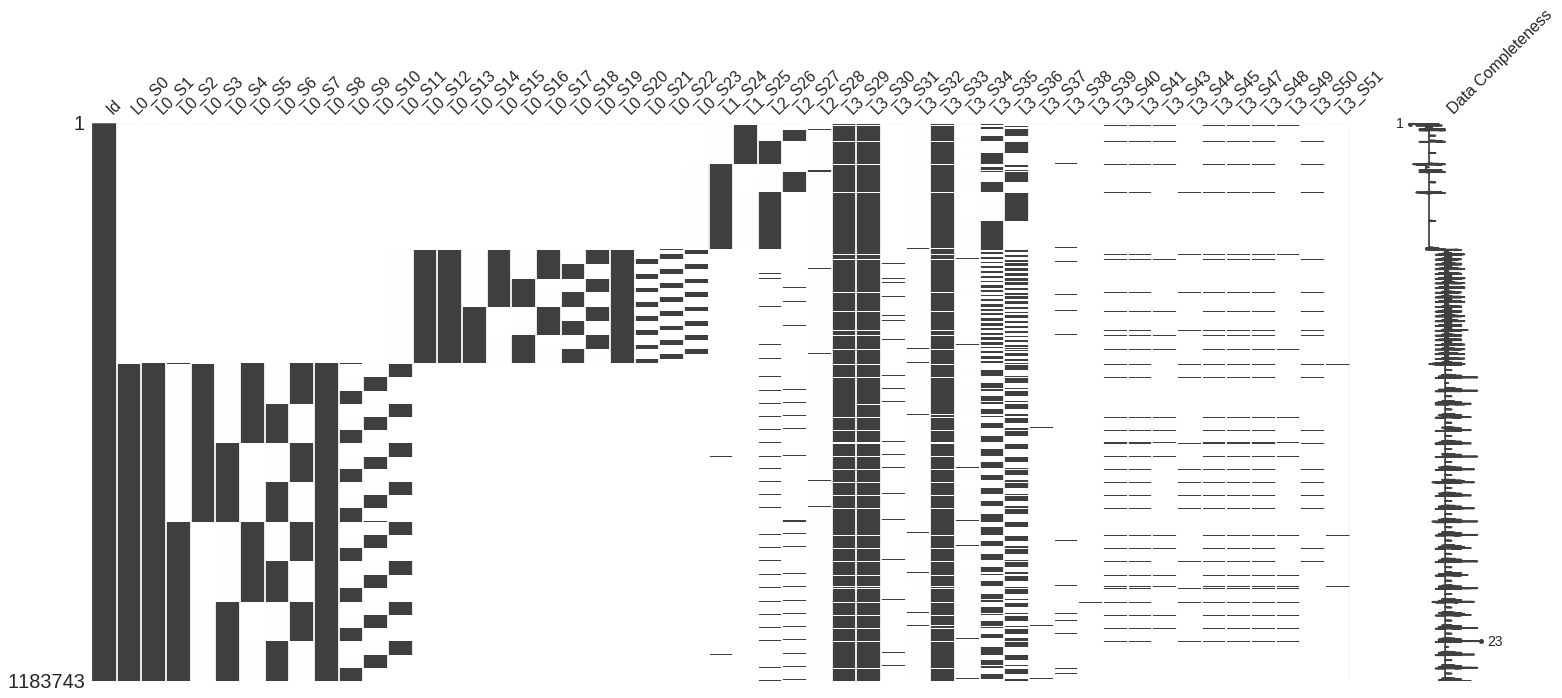

In [12]:
df_final = pd.concat(final, ignore_index=True)


msno.matrix(df_final.sort_values(col[1:], na_position='first'), labels=True)


In [31]:
col_line_station = ['L0_S0', 'L0_S1', 'L0_S2', 'L0_S3', 'L0_S4', 'L0_S5', 'L0_S6', 'L0_S7', 'L0_S8', 'L0_S9',
                     'L0_S10', 'L0_S11', 'L0_S12', 'L0_S13', 'L0_S14', 'L0_S15',
                     'L0_S16', 'L0_S17', 'L0_S18', 'L0_S19', 'L0_S20', 'L0_S21', 'L0_S22', 
                     'L0_S23', 'L1_S24', 'L1_S25', 'L2_S26', 'L2_S27', 'L2_S28',
                     'L3_S29', 'L3_S30', 'L3_S31', 'L3_S32', 'L3_S33', 'L3_S34', 'L3_S35',
                     'L3_S36', 'L3_S37', 'L3_S38', 'L3_S39', 'L3_S40', 'L3_S41', 'L3_S43',
                     'L3_S44', 'L3_S45', 'L3_S47', 'L3_S48', 'L3_S49', 'L3_S50', 'L3_S51']

temp = df_final.fillna(0).groupby(by=col_line_station).count().reset_index()

In [33]:
df_final.to_csv('../Data/df_final.csv', index=False)

pandas.core.groupby.DataFrameGroupBy